In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [2]:
start='2010-01-01'
end='2024-03-10'
stock='BHEL.NS' # bHEL.NS is symbol provide by yhoo finance website name
data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df=data

In [4]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,321.333344,324.266663,320.459991,323.480011,264.551270,3718867
2010-01-05,325.066681,326.533325,322.666656,324.720001,265.565460,1716787
2010-01-06,326.933319,327.333344,319.066681,323.500000,264.567780,2585197
2010-01-07,324.000000,324.533325,317.633331,321.266663,262.741211,2243850
2010-01-08,322.666656,325.573334,321.533325,323.213318,264.333221,2077987


In [5]:
df.reset_index(inplace=True)

In [6]:
df.sample(5) # using sample function be get rendom row data display

,Date,Open,High,Low,Close,Adj Close,Volume
2206,2018-12-12,65.000000,66.949997,64.599998,66.349998,63.314617,9954488
1388,2015-08-17,174.666672,176.000000,170.666672,174.633331,160.354462,2861506
3344,2023-07-20,95.199997,96.949997,94.699997,95.750000,95.366425,24047166
181,2010-09-23,330.533325,330.853333,325.073334,326.413330,269.595612,4176337
294,2011-03-08,269.333344,273.066681,269.066681,271.086670,223.899429,3911872


In [7]:
df.shape # how many rows and columns exist in this data fream(df)

(3501, 7)

In [8]:
df.isnull().sum() # so here check this df contain null value or not

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.info() ###### so here check this data wich type data contain like int ,float,double,
#### note---> pandas alway  object data type consider alway as an string 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3501 non-null   datetime64[ns]
 1   Open       3501 non-null   float64       
 2   High       3501 non-null   float64       
 3   Low        3501 non-null   float64       
 4   Close      3501 non-null   float64       
 5   Adj Close  3501 non-null   float64       
 6   Volume     3501 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 191.6 KB


In [10]:
mav_100_days=df.Close.rolling(100).mean()    # here mav--moving avar

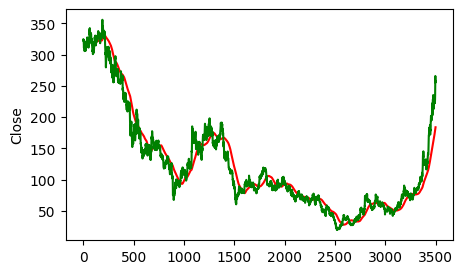

In [11]:
plt.figure(figsize=(5, 3))
sns.lineplot(mav_100_days, color='r')
sns.lineplot(df.Close, color='g')
plt.show()


In [12]:
mav_200_days=df.Close.rolling(200).mean()    # here mav--moving avar

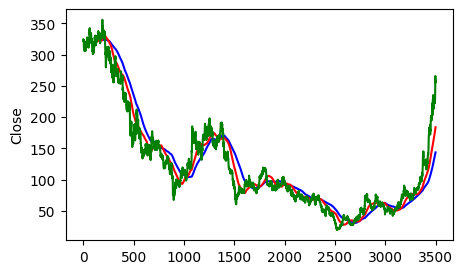

In [13]:
plt.figure(figsize=(5, 3))
sns.lineplot(mav_200_days,color='b')
sns.lineplot(mav_100_days, color='r')
sns.lineplot(df.Close, color='g')
plt.show()


In [14]:
df.dropna(inplace=True)

In [15]:
df_train=pd.DataFrame(df.Close[0:int(len(df)*0.80)])
df_test=pd.DataFrame(df.Close[int(len(df)*0.80):len(df)])

In [16]:
df_train.shape[0]

2800

In [17]:
df_test.shape

(701, 1)

In [18]:
from sklearn.preprocessing import MinMaxScaler # here do this scaling 0 & 1 form
scaler=MinMaxScaler(feature_range=(0,1))

In [19]:
df_train_scaler=scaler.fit_transform(df_train)

In [20]:
x=[]
y=[]
for i in range(100,df_train_scaler.shape[0]):
    x.append(df_train_scaler[i-100:i])
    y.append(df_train_scaler[i,0])

In [21]:
x,y=np.array(x),np.array(y)

In [22]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [23]:
model=Sequential()
model.add(LSTM(units=50,activation ='relu', return_sequences=True,
              input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))



In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [25]:
model.fit(x,y,epochs =5,batch_size=32,verbose=1) # model done

Epoch 1/5
85/85 [==============================] - 68s 606ms/step - loss: 0.0243
Epoch 2/5
85/85 [==============================] - 48s 563ms/step - loss: 0.0050
Epoch 3/5
85/85 [==============================] - 46s 535ms/step - loss: 0.0049
Epoch 4/5
85/85 [==============================] - 103s 1s/step - loss: 0.0048
Epoch 5/5
85/85 [==============================] - 76s 892ms/step - loss: 0.0048


In [26]:
model.summary()  # model of overview in brife 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
past_100_days=df_train.tail(100)

In [28]:
df_test=pd.concat([past_100_days,df_test],ignore_index=True)

In [29]:
df_test.shape

(801, 1)

In [30]:
df_test.head(5)

,Close
0,36.849998
1,36.349998
2,36.349998
3,35.849998
4,35.849998


In [31]:
df_test_scaler=scaler.fit_transform(df_test)

In [32]:
x=[]
y=[]
for i in range(100,df_test_scaler.shape[0]):
    x.append(df_test_scaler[i-100:i])
    y.append(df_test_scaler[i,0])

In [33]:
x,y=np.array(x),np.array(y)

In [34]:
y_predict=model.predict(x)

22/22 [==============================] - 5s 171ms/step


In [35]:
y_predict

array([[0.06936772],
       [0.0716726 ],
       [0.0751024 ],
       [0.07980655],
       [0.08575617],
       [0.09280467],
       [0.10063644],
       [0.10875201],
       [0.11679598],
       [0.1245661 ],
       [0.1319223 ],
       [0.13877591],
       [0.145066  ],
       [0.15074864],
       [0.15580243],
       [0.16023922],
       [0.16409194],
       [0.16742031],
       [0.1703217 ],
       [0.17288491],
       [0.17517367],
       [0.17724214],
       [0.1791358 ],
       [0.18080455],
       [0.18219742],
       [0.183256  ],
       [0.18392712],
       [0.18417346],
       [0.18402186],
       [0.18352664],
       [0.18275252],
       [0.18175521],
       [0.1805931 ],
       [0.1793342 ],
       [0.17802146],
       [0.17669365],
       [0.17538056],
       [0.17411128],
       [0.1729102 ],
       [0.1717861 ],
       [0.17076099],
       [0.16985157],
       [0.16906416],
       [0.16839819],
       [0.16784638],
       [0.16739407],
       [0.16701847],
       [0.166

In [36]:
scale=1/scaler.scale_

In [37]:
y_predict=y_predict*scale # this value is predicted 

In [38]:
y=y*scale  # this value is the actual value  

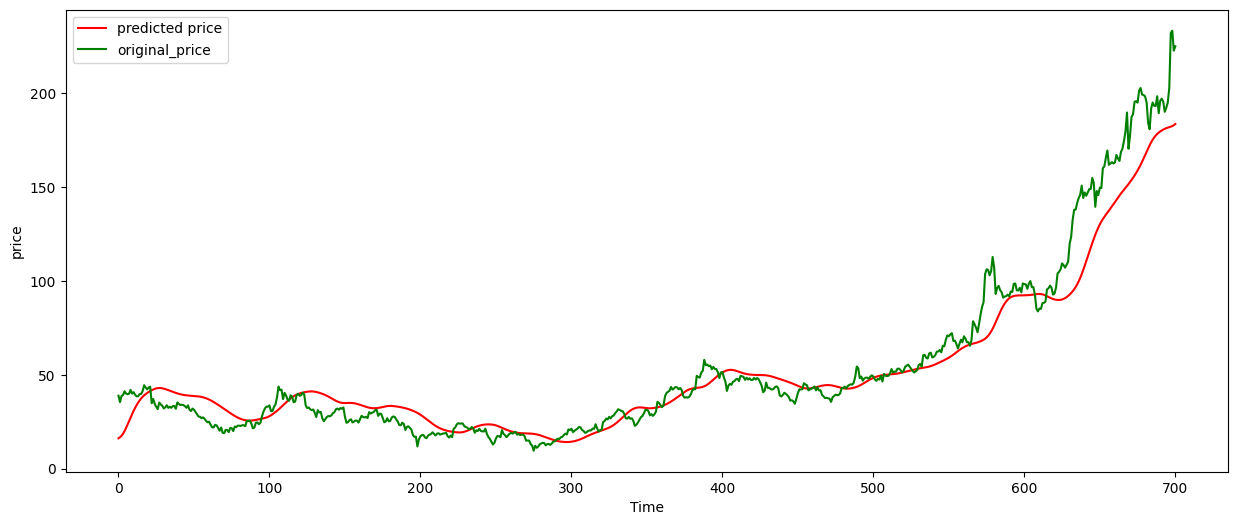

In [39]:
plt.figure(figsize=(15,6))
plt.plot(y_predict,'r',label='predicted price')
plt.plot(y,'g',label='original_price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()

In [43]:
model.save('Stack.keras')